In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

In [2]:
results_df = pd.read_csv('results.csv')
results_df.head()

,graph,instance,algorithm,requests,robots,capacity,demand,num_instance,isBigTW,cost,time,distance,used_vehicles,used_max,used_min,used_mean,computational_time
0,mountain,3HR_6Q_100RQT_3q_4,MILP,100,3,6,3,4,False,1626.0,1965.0,1606.0,2.0,832.0,774.0,803.000000,2.860000
1,mountain,3HR_6Q_100RQT_3q_4,Heuristic,100,3,6,3,4,False,1638.0,1965.0,1618.0,2.0,1168.0,450.0,809.000000,0.478401
2,mountain,3HR_6Q_100RQT_3q_3,MILP,100,3,6,3,3,False,1586.0,1885.0,1556.0,3.0,798.0,142.0,518.666667,2.780000
3,mountain,3HR_6Q_100RQT_3q_3,Heuristic,100,3,6,3,3,False,1588.0,1887.0,1568.0,2.0,956.0,612.0,784.000000,0.447094
4,mountain,3HR_6Q_50RQT_3q_6,MILP,50,3,6,3,6,False,802.0,939.0,782.0,2.0,418.0,364.0,391.000000,0.600000


# Cost comparison

Number of instances where the MILP is better: 577
Number of instances where the Heuristic is better: 129
Number of instances where both algorithms are equal: 65


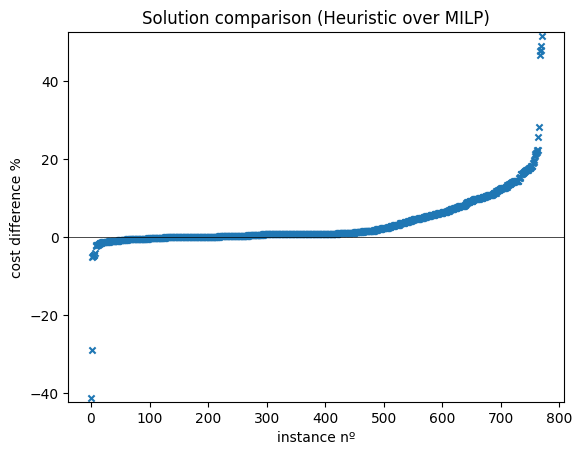

In [3]:
results_df["instance_name"] = results_df["graph"] + "/" + results_df["instance"] 

urjc_costs = results_df[results_df['algorithm'] == 'MILP'][["instance_name", "cost"]]
upv_costs = results_df[results_df['algorithm'] == 'Heuristic'][["instance_name", "cost"]]
urjc_costs = urjc_costs.rename(columns={"cost": "MILP"})
upv_costs = upv_costs.rename(columns={"cost": "Heuristic"})
costs_df = urjc_costs.merge(upv_costs, on="instance_name")
costs_df["diff"] = costs_df["Heuristic"] - costs_df["MILP"]
costs_df["diff %"] = costs_df["diff"] / costs_df["MILP"] * 100
costs_df["diff %"] = costs_df["diff %"].round(2)

print(f"Number of instances where the MILP is better: {len(costs_df[costs_df['diff %'] > 0])}")
print(f"Number of instances where the Heuristic is better: {len(costs_df[costs_df['diff %'] < 0])}")
print(f"Number of instances where both algorithms are equal: {len(costs_df[costs_df['diff %'] == 0])}")

# Plot sorted
costs_df["plot_index"] = range(len(costs_df))
sorted_df = costs_df.sort_values(by=['diff %'], ascending=True)
sorted_df['plot_index'] = pd.Series(range(len(sorted_df)), index=sorted_df.index)

sorted_df.plot(kind='scatter', marker='x', title='Solution comparison (Heuristic over MILP)', legend=False,
                   x='plot_index',
                   xlabel='instance nº', y='diff %', ylabel='cost difference %', ylim=(min(sorted_df['diff %'])-1, max(sorted_df['diff %'])+1)).axhline(0, color='k', lw=0.5)

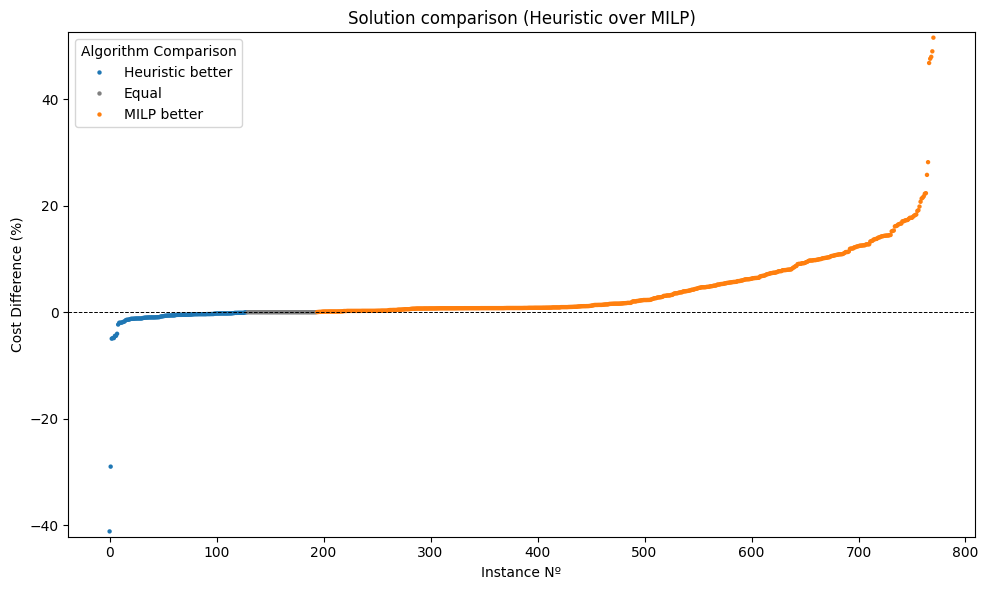

In [4]:
# IMPROVED WITH SEABORN AND CHATGPT

#TODO: Exact method vs Heuristic

# Sort and index for plotting
sorted_df = costs_df.sort_values(by='diff %', ascending=True).reset_index(drop=True)
sorted_df["plot_index"] = sorted_df.index

# Add a category for color coding
def categorize(row):
    if row['diff %'] < 0:
        return 'Heuristic better'
    elif row['diff %'] > 0:
        return 'MILP better'
    else:
        return 'Equal'

sorted_df['comparison'] = sorted_df.apply(categorize, axis=1)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sorted_df, x="plot_index", y="diff %", hue="comparison", style="comparison",
                palette={"Heuristic better": "tab:blue", "MILP better": "tab:orange", "Equal": "gray"},
                markers={"Heuristic better": "o", "MILP better": "o", "Equal": "o"},
                s=10,
                edgecolor='none')

# Add horizontal reference line at y=0
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)

# Titles and labels
plt.title("Solution comparison (Heuristic over MILP)")
plt.xlabel("Instance Nº")
plt.ylabel("Cost Difference (%)")
plt.ylim(min(sorted_df["diff %"]) - 1, max(sorted_df["diff %"]) + 1)

plt.legend(title="Algorithm Comparison")
plt.tight_layout()
plt.show()


## Cost comparison grouped by graph

Graph: "mountain"
	Num. instances where the MILP is better: 82 (34.17%)
	Num. of instances where the Heuristic is better: 94 (39.17%)
	Num. of instances where both algorithms are equal: 64 (26.67%)



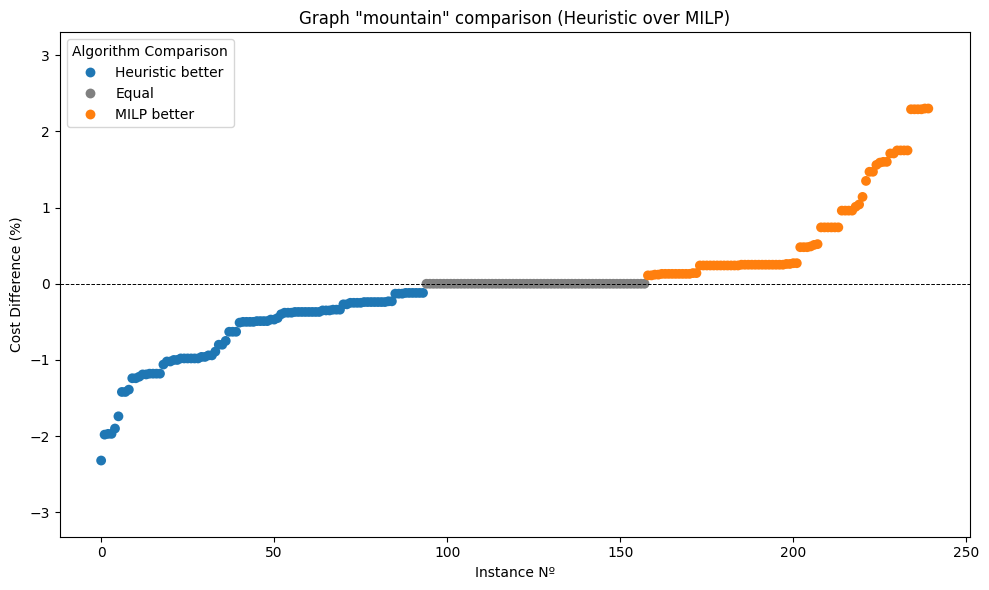

Graph: "random"
	Num. instances where the MILP is better: 218 (90.83%)
	Num. of instances where the Heuristic is better: 22 (9.17%)
	Num. of instances where both algorithms are equal: 0 (0.0%)



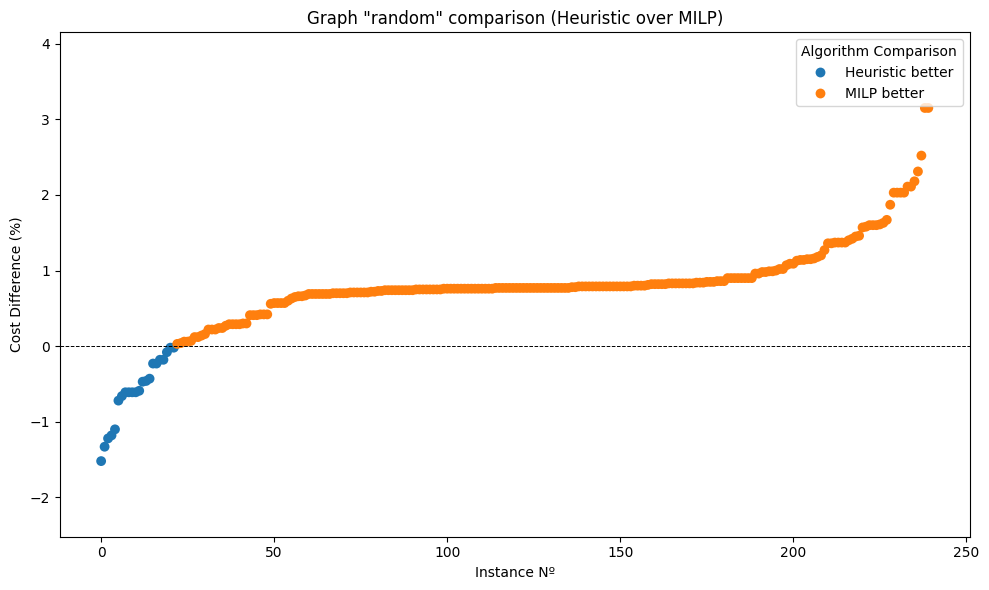

Graph: "big_vid"
	Num. instances where the MILP is better: 122 (96.06%)
	Num. of instances where the Heuristic is better: 4 (3.15%)
	Num. of instances where both algorithms are equal: 1 (0.79%)



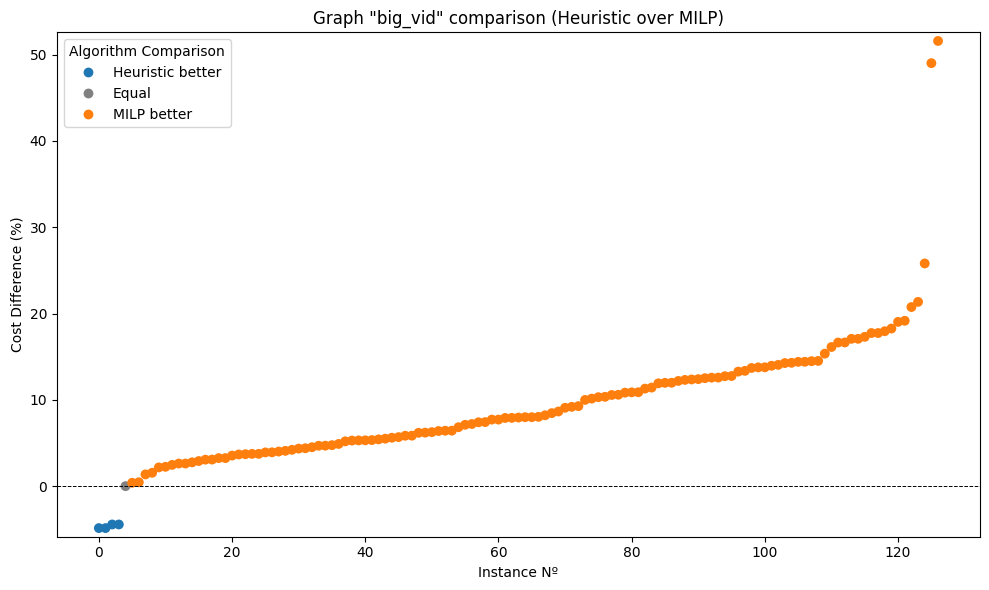

Graph: "big_vid_2"
	Num. instances where the MILP is better: 155 (94.51%)
	Num. of instances where the Heuristic is better: 9 (5.49%)
	Num. of instances where both algorithms are equal: 0 (0.0%)



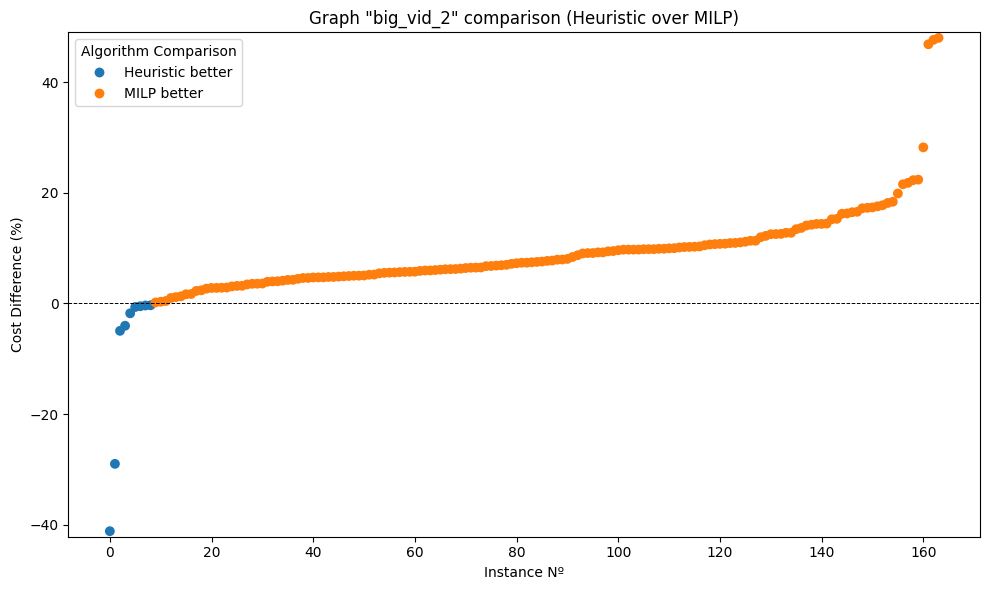

In [5]:
results_df["instance_name"] = results_df["graph"] + "/" + results_df["instance"]

urjc_costs = results_df[results_df['algorithm'] == 'MILP'][["graph", "instance_name", "cost"]]
upv_costs = results_df[results_df['algorithm'] == 'Heuristic'][["graph", "instance_name", "cost"]]
urjc_costs = urjc_costs.rename(columns={"cost": "MILP"})
upv_costs = upv_costs.rename(columns={"cost": "Heuristic"})
costs_df = urjc_costs.merge(upv_costs, on=["instance_name", "graph"])
costs_df["diff"] = costs_df["Heuristic"] - costs_df["MILP"]
costs_df["diff %"] = costs_df["diff"] / costs_df["MILP"] * 100
costs_df["diff %"] = costs_df["diff %"].round(2)

# Cost comparison grouped by graph
graphs = costs_df["graph"].unique()
for graph in graphs:
    print(f"Graph: \"{graph}\"")
    graph_costs_df = costs_df[costs_df["graph"] == graph]
    graph_total_instances = len(graph_costs_df)

    graph_urjc_better = len(graph_costs_df[graph_costs_df['diff %'] > 0])
    graph_urjc_better_percent = round(graph_urjc_better / graph_total_instances * 100, 2)

    graph_upv_better = len(graph_costs_df[graph_costs_df['diff %'] < 0])
    graph_upv_better_percent = round(graph_upv_better / graph_total_instances * 100, 2)

    graph_same = len(graph_costs_df[graph_costs_df['diff %'] == 0])
    graph_same_percent = round(graph_same / graph_total_instances * 100, 2)

    print(f"\tNum. instances where the MILP is better: {graph_urjc_better} ({graph_urjc_better_percent}%)")
    print(f"\tNum. of instances where the Heuristic is better: {graph_upv_better} ({graph_upv_better_percent}%)")
    print(f"\tNum. of instances where both algorithms are equal: {graph_same} ({graph_same_percent}%)\n")

    # IMPROVED WITH SEABORN AND CHATGPT

    # Sort and index for plotting
    graph_sorted_df = graph_costs_df.sort_values(by='diff %', ascending=True).reset_index(drop=True)
    graph_sorted_df["plot_index"] = graph_sorted_df.index

    # Add a category for color coding
    def categorize(row):
        if row['diff %'] < 0:
            return 'Heuristic better'
        elif row['diff %'] > 0:
            return 'MILP better'
        else:
            return 'Equal'

    graph_sorted_df['comparison'] = graph_sorted_df.apply(categorize, axis=1)

    # Plot with seaborn
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=graph_sorted_df, x="plot_index", y="diff %", hue="comparison", style="comparison",
                    palette={"Heuristic better": "tab:blue", "MILP better": "tab:orange", "Equal": "gray"},
                    markers={"Heuristic better": "o", "MILP better": "o", "Equal": "o"},
                    s=50,
                    edgecolor='none')

    # Add horizontal reference line at y=0
    plt.axhline(0, color='black', linestyle='--', linewidth=0.7)

    # Titles and labels
    plt.title("Graph \""+str(graph)+"\" comparison (Heuristic over MILP)")
    plt.xlabel("Instance Nº")
    plt.ylabel("Cost Difference (%)")
    plt.ylim(min(graph_sorted_df["diff %"]) - 1, max(graph_sorted_df["diff %"]) + 1)

    plt.legend(title="Algorithm Comparison")
    plt.tight_layout()
    plt.show()

# Time comparison

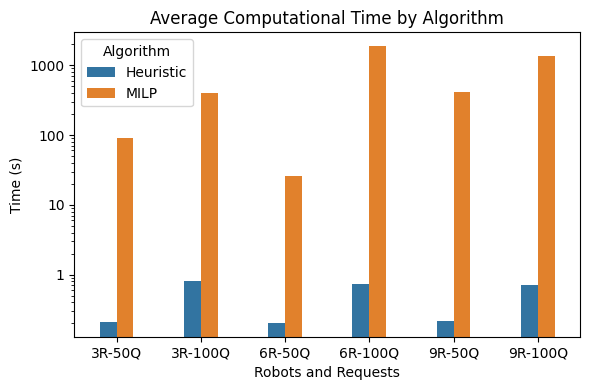

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean computational time grouped by algorithm, robots, and requests
limited_results_df = results_df[['graph', 'algorithm', 'robots', 'requests', 'cost', 'computational_time']]
grouped_time = limited_results_df.groupby(['algorithm', 'robots', 'requests'])['computational_time'].mean().reset_index()

# Create a combined column for 'robots and requests' for x-axis labeling
grouped_time['Robots & Requests'] = grouped_time.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(
    data=grouped_time,
    x='Robots & Requests',
    y='computational_time',
    hue='algorithm',
    width=0.4 # Adjust width for better spacing
)

# Set logarithmic scale
plt.yscale("log")
# Use plain numbers instead of scientific notation on y-axis
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Labels and formatting
plt.title('Average Computational Time by Algorithm')
plt.xlabel('Robots and Requests')
plt.ylabel('Time (s)')
plt.xticks(rotation=0) # 30 is good


plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()


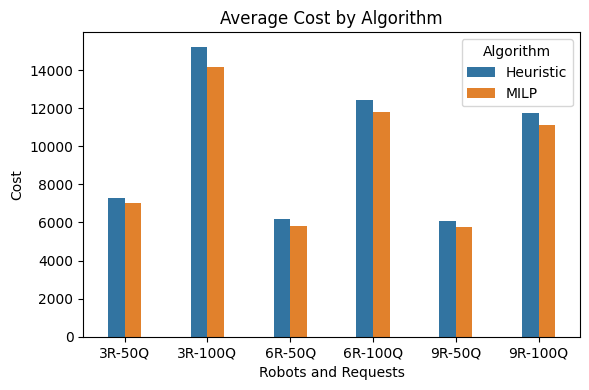

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean computational time grouped by algorithm, robots, and requests
limited_results_df = results_df[['graph', 'algorithm', 'robots', 'requests', 'cost', 'computational_time']]
grouped_time = limited_results_df.groupby(['algorithm', 'robots', 'requests'])['cost'].mean().reset_index()

# Create a combined column for 'robots and requests' for x-axis labeling
grouped_time['Robots & Requests'] = grouped_time.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.barplot(
    data=grouped_time,
    x='Robots & Requests',
    y='cost',
    hue='algorithm',
    width=0.4 # Adjust width for better spacing
)


# Labels and formatting
plt.title('Average Cost by Algorithm')
plt.xlabel('Robots and Requests')
plt.ylabel('Cost')
plt.xticks(rotation=0) # 30 is good


plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()


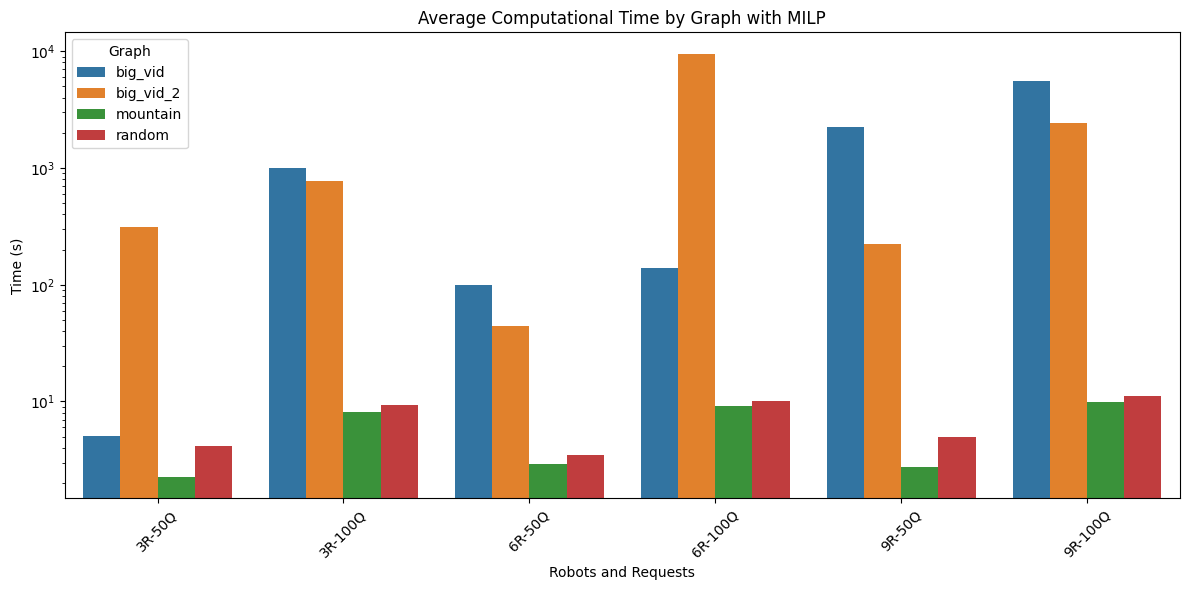

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for MILP and select relevant columns
limited_results_urjc_df = results_df[results_df.algorithm == 'MILP']
limited_results_urjc_df = limited_results_urjc_df[['graph', 'robots', 'requests', 'cost', 'computational_time']]

# Group and compute mean
grouped_time = limited_results_urjc_df.groupby(['graph', 'robots', 'requests'])['computational_time'].mean().reset_index()

# Create a combined label for x-axis
grouped_time['Robots & Requests'] = grouped_time.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_time,
    x='Robots & Requests',
    y='computational_time',
    hue='graph'
)

# Set logarithmic scale
plt.yscale("log")

# Styling
plt.title('Average Computational Time by Graph with MILP')
plt.xlabel('Robots and Requests')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.legend(title='Graph')
plt.tight_layout()
plt.show()


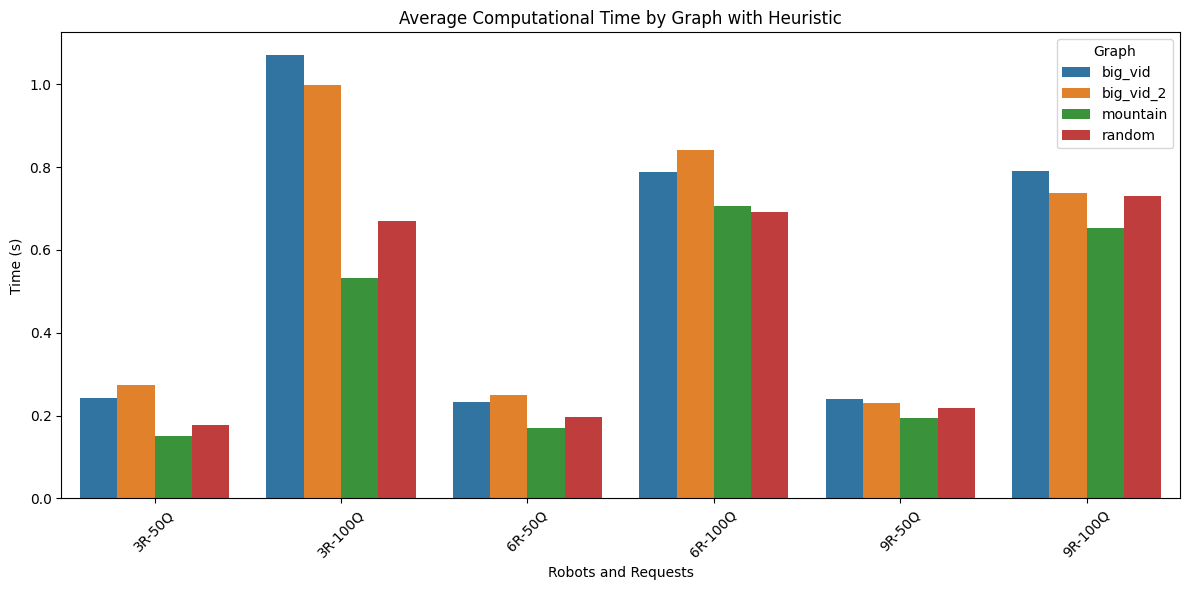

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for upv and select relevant columns
limited_results_upv_df = results_df[results_df.algorithm == 'Heuristic']
limited_results_upv_df = limited_results_upv_df[['graph', 'robots', 'requests', 'cost', 'computational_time']]

# Group and compute mean
grouped_time = limited_results_upv_df.groupby(['graph', 'robots', 'requests'])['computational_time'].mean().reset_index()

# Create a combined label for x-axis
grouped_time['Robots & Requests'] = grouped_time.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped_time,
    x='Robots & Requests',
    y='computational_time',
    hue='graph'
)

# Styling
plt.title('Average Computational Time by Graph with Heuristic')
plt.xlabel('Robots and Requests')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.legend(title='Graph')
plt.tight_layout()
plt.show()


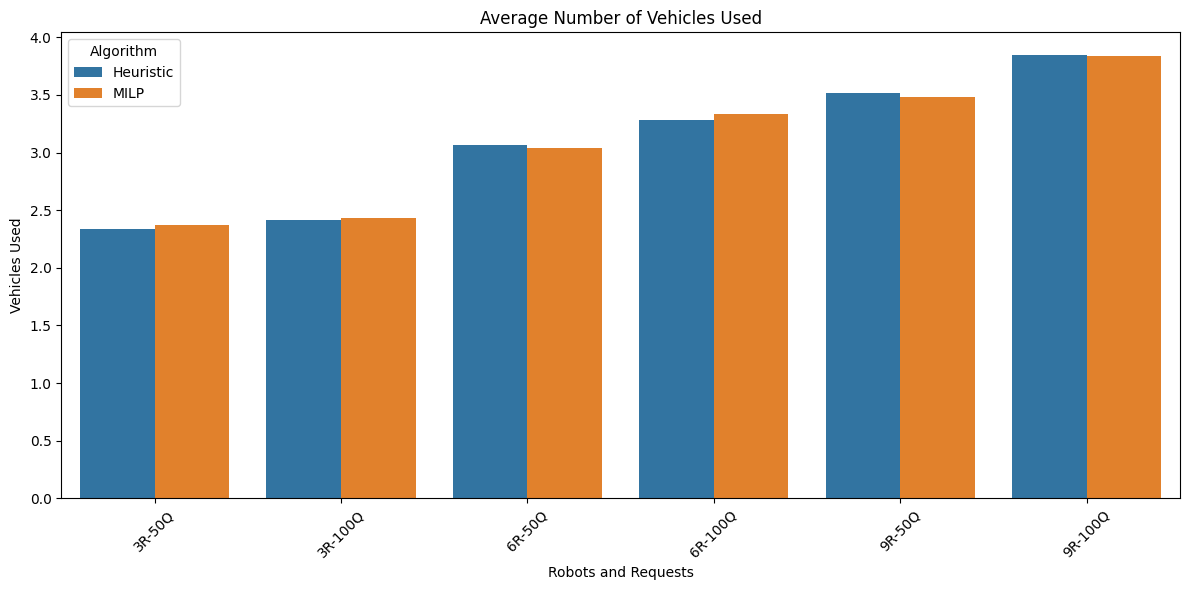

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select and group data
limited_results_df = results_df[['graph', 'algorithm', 'robots', 'requests', 'used_vehicles']]
grouped = limited_results_df.groupby(['algorithm', 'robots', 'requests'])['used_vehicles'].mean().reset_index()

# Create composite label for x-axis
grouped['Robots & Requests'] = grouped.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='Robots & Requests',
    y='used_vehicles',
    hue='algorithm',
)

# Styling
plt.title('Average Number of Vehicles Used')
plt.xlabel('Robots and Requests')
plt.ylabel('Vehicles Used')
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()


/tmp/ipykernel_794270/3703637292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_results_df['Robots & Requests'] = limited_results_df.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)


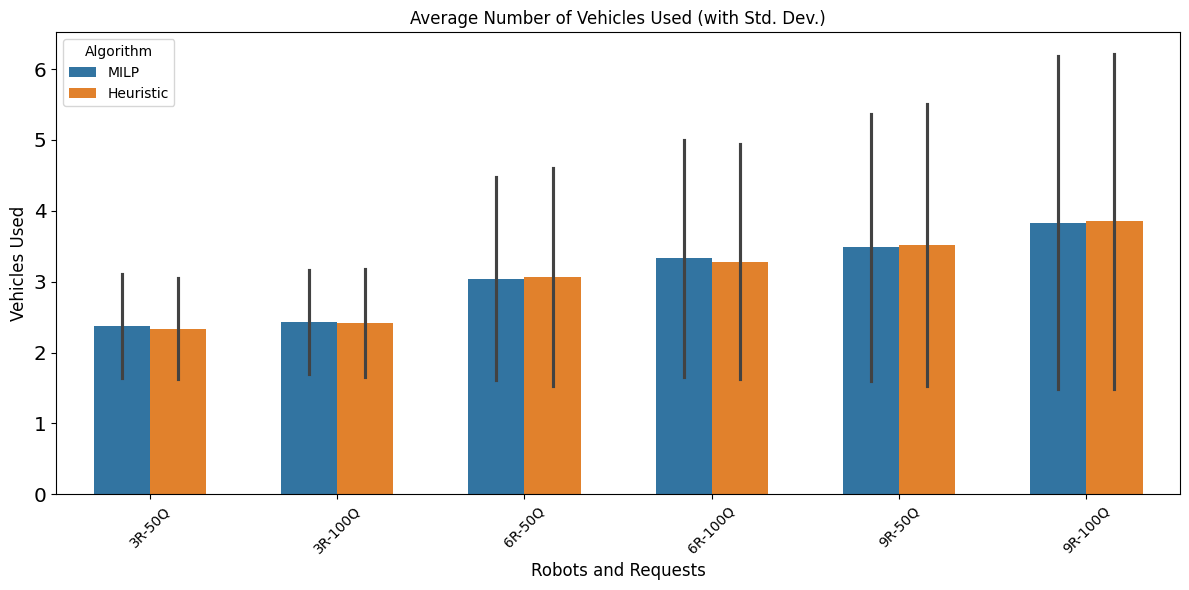

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select and group data
limited_results_df = results_df[['graph', 'algorithm', 'robots', 'requests', 'used_vehicles']]
limited_results_df['Robots & Requests'] = limited_results_df.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Sort by robots then requests
limited_results_df = limited_results_df.sort_values(by=['robots', 'requests'])

# Create ordered category for correct x-axis order
ordered_x = limited_results_df[['robots', 'requests', 'Robots & Requests']].drop_duplicates()
ordered_x = ordered_x.sort_values(by=['robots', 'requests'])
x_order = ordered_x['Robots & Requests'].tolist()

# Plot with standard deviation as error bars
plt.figure(figsize=(12, 6))
sns.barplot(
    data=limited_results_df,
    x='Robots & Requests',
    y='used_vehicles',
    hue='algorithm',
    errorbar='sd',  # Show standard deviation
    order=x_order,  # <-- Control x-axis order here
     width=0.6
)

# Styling
plt.title('Average Number of Vehicles Used (with Std. Dev.)')
plt.xlabel('Robots and Requests', size='large')
plt.ylabel('Vehicles Used', size='large')
plt.xticks(rotation=45)
plt.xticks(rotation=45)
plt.yticks(size="x-large")
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()


/tmp/ipykernel_794270/1048190376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_results_df['Robots & Requests'] = limited_results_df.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)


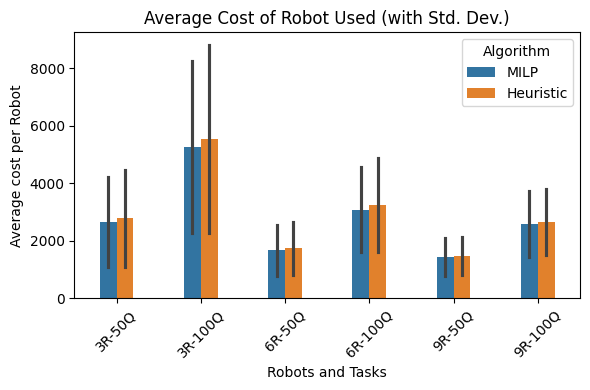

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select and group data
limited_results_df = results_df[['graph', 'algorithm', 'robots', 'requests', 'used_mean']]
limited_results_df['Robots & Requests'] = limited_results_df.apply(lambda row: f"{row['robots']}R-{row['requests']}Q", axis=1)

# Sort by robots then requests
limited_results_df = limited_results_df.sort_values(by=['robots', 'requests'])

# Create ordered category for correct x-axis order
ordered_x = limited_results_df[['robots', 'requests', 'Robots & Requests']].drop_duplicates()
ordered_x = ordered_x.sort_values(by=['robots', 'requests'])
x_order = ordered_x['Robots & Requests'].tolist()

# Plot with standard deviation as error bars
plt.figure(figsize=(6, 4))
sns.barplot(
    data=limited_results_df,
    x='Robots & Requests',
    y='used_mean',
    hue='algorithm',
    errorbar='sd',  # Show standard deviation
    order=x_order,  # <-- Control x-axis order here
    width=0.4
)


# Styling
plt.title('Average Cost of Robot Used (with Std. Dev.)')
plt.xlabel('Robots and Tasks')
plt.ylabel('Average cost per Robot')
plt.xticks(rotation=45)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()


# Tables

Show the comutational time

In [17]:
subset_columns = ['graph', 'num_instance', 'robots', 'requests', 'demand', 'isBigTW', 'cost',  'computational_time', 'used_vehicles', "used_max", 'used_min', 'used_mean'] # 


urjc_results_df = results_df[results_df.algorithm == 'MILP']
urjc_results_df = urjc_results_df[subset_columns]
rename_urjc = {
    'cost' : 'urjc_cost',
    'time' : 'urjc_time',
    'distance' : 'urjc_distance',
    'used_vehicles': 'urjc_used_vehicles',
    'used_max': 'urjc_used_max',
    'used_min': 'urjc_used_min',
    'used_mean': 'urjc_used_mean',
    'computational_time': 'urjc_computational_time'
}
urjc_results_df = urjc_results_df.rename(columns=rename_urjc)
urjc_results_df

upv_results_df = results_df[results_df.algorithm == 'Heuristic']
upv_results_df = upv_results_df[subset_columns]
rename_upv = {
    'cost' : 'upv_cost',
    'time' : 'upv_time',
    'distance' : 'upv_distance',
    'used_vehicles': 'upv_used_vehicles',
    'used_max': 'upv_used_max',
    'used_min': 'upv_used_min',
    'used_mean': 'upv_used_mean',
    'computational_time': 'upv_computational_time'
}
upv_results_df = upv_results_df.rename(columns=rename_upv)

## Remove bigTW
upv_results_df = upv_results_df[upv_results_df['isBigTW'] == False]
urjc_results_df = urjc_results_df[urjc_results_df['isBigTW'] == False]

# Merge the two DataFrames on the common columns
merged_df = pd.merge(urjc_results_df, upv_results_df, on=['graph', "num_instance", 'robots', 'requests', 'demand', 'isBigTW'], how='inner')
merged_df["diff %"] = (merged_df['upv_cost'] - merged_df['urjc_cost']) / merged_df["urjc_cost"] * 100

merged_df

,graph,num_instance,robots,requests,demand,isBigTW,urjc_cost,urjc_computational_time,urjc_used_vehicles,urjc_used_max,urjc_used_min,urjc_used_mean,upv_cost,upv_computational_time,upv_used_vehicles,upv_used_max,upv_used_min,upv_used_mean,diff %
0,mountain,4,3,100,3,False,1626.0,2.86,2.0,832.0,774.0,803.000000,1638.0,0.478401,2.0,1168.0,450.0,809.000000,0.738007
1,mountain,3,3,100,3,False,1586.0,2.78,3.0,798.0,142.0,518.666667,1588.0,0.447094,2.0,956.0,612.0,784.000000,0.126103
2,mountain,6,3,50,3,False,802.0,0.60,2.0,418.0,364.0,391.000000,804.0,0.131692,2.0,536.0,248.0,392.000000,0.249377
3,mountain,1,3,50,3,False,820.0,0.61,3.0,478.0,122.0,263.333333,812.0,0.129372,2.0,434.0,358.0,396.000000,-0.975610
4,mountain,8,3,50,3,False,840.0,1.14,3.0,444.0,134.0,270.000000,840.0,0.130894,2.0,534.0,286.0,410.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,big_vid_2,8,6,50,3,False,11330.0,87.44,5.0,3360.0,1660.0,2256.000000,12060.0,0.190554,6.0,3320.0,1080.0,2000.000000,6.443071
476,big_vid_2,7,6,100,3,False,25370.0,52.51,5.0,7040.0,3320.0,5064.000000,26580.0,0.799764,6.0,7580.0,780.0,4420.000000,4.769413
477,big_vid_2,1,6,50,3,False,13700.0,13.82,6.0,4260.0,220.0,2273.333333,13740.0,0.227462,6.0,4860.0,220.0,2280.000000,0.291971
478,big_vid_2,9,6,100,3,False,25680.0,103.64,6.0,6560.0,3100.0,4270.000000,26920.0,0.795481,6.0,7800.0,1200.0,4476.666667,4.828660


In [18]:
merged_df.describe()

,num_instance,robots,requests,demand,urjc_cost,urjc_computational_time,urjc_used_vehicles,urjc_used_max,urjc_used_min,urjc_used_mean,upv_cost,upv_computational_time,upv_used_vehicles,upv_used_max,upv_used_min,upv_used_mean,diff %
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,4.500000,6.000000,75.000000,2.500000,11002.620833,452.565600,3.662500,4147.506250,1686.877083,2892.001372,11688.722917,0.461585,3.670833,4413.060361,1592.747989,2974.687831,4.132373
std,2.875278,2.452045,25.026082,0.500522,8222.023990,2204.008827,1.635543,2789.037268,1835.848666,2170.064721,8986.846711,0.373201,1.698576,3008.385468,1770.360804,2209.849022,7.209123
min,0.000000,3.000000,50.000000,2.000000,784.000000,0.600000,2.000000,356.000000,18.000000,263.333333,796.000000,0.118933,2.000000,400.000000,60.000000,388.000000,-41.179020
25%,2.000000,3.000000,50.000000,2.000000,4178.000000,1.920000,2.000000,1662.500000,421.750000,1147.312500,4204.250000,0.211232,2.000000,2087.280883,418.499965,1154.155410,0.277593
50%,4.500000,6.000000,75.000000,2.500000,10458.500000,4.010000,3.000000,3980.000000,994.000000,2564.416667,10904.500000,0.424898,3.000000,4199.515044,910.819601,2596.287137,1.598707
75%,7.000000,9.000000,100.000000,3.000000,18717.500000,52.695000,5.000000,5900.000000,2281.250000,3896.666667,16695.000000,0.708871,5.000000,6148.182643,2033.970634,3940.833333,6.462806
max,9.000000,9.000000,100.000000,3.000000,38470.000000,33518.700000,9.000000,11440.000000,8700.000000,9266.666667,38570.000000,5.992779,9.000000,12960.000000,9460.000000,10106.666667,51.575931


In [20]:
452.56/0.46

983.8260869565217

In [46]:
# Group by graph, requests, and robots, and calculate mean and max for relevant columns
grouped_df = merged_df.drop(columns=['num_instance']).groupby(['graph', 'requests', 'robots']).agg({
    "urjc_cost": ['mean', 'max', 'min'],
    "urjc_computational_time": ['mean', 'max', 'min'],
    "upv_cost": ['mean', 'max', 'min'],
    "upv_computational_time": ['mean', 'max', 'min'],
}).round(2)

grouped_df = grouped_df[["urjc_cost",	"urjc_computational_time",	"upv_cost",	"upv_computational_time"]].round(2)
grouped_df

urjc_cost                   urjc_computational_time  \
                               mean      max      min                    mean   
graph     requests robots                                                       
big_vid   50       3       12566.50  14270.0  11220.0                    5.02   
                   6       10812.50  12200.0   9590.0                   99.98   
                   9       10809.00  13740.0   9160.0                 2230.33   
          100      3       24124.00  25510.0  22550.0                   11.58   
                   6       21561.50  23090.0  20130.0                  140.34   
                   9       20329.50  22750.0  18660.0                 5545.93   
big_vid_2 50       3       13188.00  23070.0  11130.0                    4.53   
                   6       11735.00  13700.0  10020.0                   44.56   
                   9       11401.00  12940.0   9960.0                  224.98   
          100      3       26648.00  38470.0  24150.0                    9.20   
                   6       23770.50  26140.0  20520.0                   88.25   
                   9       22602.50  25420.0  19510.0                 2428.17   
mountain  50       3         839.90    916.0    794.0                    0.91   
                   6         839.20    916.0    784.0                    1.19   
                   9         841.20    916.0    784.0                    1.36   
          100      3        1629.60   1766.0   1470.0                    2.83   
                   6        1625.60   1760.0   1452.0                    3.19   
                   9        1624.30   1752.0   1460.0                    3.63   
random    50       3        5421.45   5878.0   4982.0                    1.47   
                   6        5356.50   5878.0   5078.0                    1.55   
                   9        5295.45   5616.0   4995.0                    1.65   
          100      3       10557.15  11542.0   9267.0                    3.09   
                   6       10285.90  11542.0   9131.0                    3.49   
                   9       10198.65  11604.0   9131.0                    4.35   

                                             upv_cost                    \
                                max     min      mean      max      min   
graph     requests robots                                                 
big_vid   50       3          12.20    2.50  13054.00  14590.0  11610.0   
                   6         345.16   22.14  12041.00  13660.0  10110.0   
                   9       13590.83   71.95  11896.00  14100.0  10130.0   
          100      3          17.80    8.40  26272.00  37030.0  23570.0   
                   6         425.64   43.34  23511.00  26140.0  21390.0   
                   9       33518.70  760.70  22539.00  23830.0  21620.0   
big_vid_2 50       3          14.90    1.80  13232.00  15130.0  10930.0   
                   6         143.57    9.24  12699.00  15020.0  11170.0   
                   9         642.92   47.33  12251.00  14230.0  10700.0   
          100      3          18.09    5.76  28887.00  38570.0  25210.0   
                   6         201.35   37.13  25037.00  27760.0  21650.0   
                   9       13340.13  145.56  24280.00  27930.0  21420.0   
mountain  50       3           1.28    0.60    844.00    932.0    796.0   
                   6           1.54    0.88    842.60    932.0    798.0   
                   9           1.61    1.14    841.80    916.0    802.0   
          100      3           2.92    2.73   1623.30   1748.0   1448.0   
                   6           3.26    3.15   1622.70   1746.0   1452.0   
                   9           3.70    3.57   1624.30   1746.0   1462.0   
random    50       3           1.55    1.38   5454.65   5923.0   5023.0   
                   6           1.64    1.50   5402.00   5923.0   5118.0   
                   9           1.96    1.56   5333.30   5606.0   5043.0   
          100      3           3.36   

In [47]:
print(grouped_df.to_latex(caption="Benchmark results.",label="table:all_results", longtable=False, float_format="%10.1f"))

\begin{table}
\caption{Benchmark results.}
\label{table:all_results}
\begin{tabular}{lllrrrrrrrrrrrr}
\toprule
 &  &  & \multicolumn{3}{r}{urjc_cost} & \multicolumn{3}{r}{urjc_computational_time} & \multicolumn{3}{r}{upv_cost} & \multicolumn{3}{r}{upv_computational_time} \\
 &  &  & mean & max & min & mean & max & min & mean & max & min & mean & max & min \\
graph & requests & robots &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{big_vid} & \multirow[t]{3}{*}{50} & 3 &    12566.5 &    14270.0 &    11220.0 &        5.0 &       12.2 &        2.5 &    13054.0 &    14590.0 &    11610.0 &        0.2 &        0.3 &        0.2 \\
 &  & 6 &    10812.5 &    12200.0 &     9590.0 &      100.0 &      345.2 &       22.1 &    12041.0 &    13660.0 &    10110.0 &        0.2 &        0.3 &        0.2 \\
 &  & 9 &    10809.0 &    13740.0 &     9160.0 &     2230.3 &    13590.8 &       72.0 &    11896.0 &    14100.0 &    10130.0 &        0.2 &        0.3 &        0.2 \\
\cline{2-15}
 &

In [21]:
grouped_df = merged_df.drop(columns=['num_instance']).groupby(['graph']).mean() #'demand', 'isBigTW'
grouped_df = grouped_df[["urjc_cost",	"urjc_computational_time",	"upv_cost",	"upv_computational_time", "diff %"]].round(2)
grouped_df

,urjc_cost,urjc_computational_time,upv_cost,upv_computational_time,diff %
graph,,,,,
big_vid,16700.50,1338.86,18218.83,0.53,9.07
big_vid_2,18224.17,466.61,19397.67,0.51,6.71
mountain,1233.30,2.18,1233.12,0.37,0.06
random,7852.52,2.60,7905.28,0.44,0.69


In [50]:
grouped_df = merged_df.drop(columns=['num_instance']).groupby(['graph',  'requests', 'robots']).mean() #'demand', 'isBigTW'
grouped_df = grouped_df[["urjc_cost",	"urjc_computational_time",	"upv_cost",	"upv_computational_time", "diff %"]].round(2)
grouped_df

urjc_cost  urjc_computational_time  upv_cost  \
graph     requests robots                                                 
big_vid   50       3        12566.50                     5.02  13054.00   
                   6        10812.50                    99.98  12041.00   
                   9        10809.00                  2230.33  11896.00   
          100      3        24124.00                    11.58  26272.00   
                   6        21561.50                   140.34  23511.00   
                   9        20329.50                  5545.93  22539.00   
big_vid_2 50       3        13188.00                     4.53  13232.00   
                   6        11735.00                    44.56  12699.00   
                   9        11401.00                   224.98  12251.00   
          100      3        26648.00                     9.20  28887.00   
                   6        23770.50                    88.25  25037.00   
                   9        22602.50                  2428.17  24280.00   
mountain  50       3          839.90                     0.91    844.00   
                   6          839.20                     1.19    842.60   
                   9          841.20                     1.36    841.80   
          100      3         1629.60                     2.83   1623.30   
                   6         1625.60                     3.19   1622.70   
                   9         1624.30                     3.63   1624.30   
random    50       3         5421.45                     1.47   5454.65   
                   6         5356.50                     1.55   5402.00   
                   9         5295.45                     1.65   5333.30   
          100      3        10557.15                     3.09  10628.55   
                   6        10285.90                     3.49  10348.05   
                   9        10198.65                     4.35  10265.10   

                           upv_computational_time  diff %  
graph     requests robots                                  
big_vid   50       3                         0.24    3.85  
                   6                         0.23   11.32  
                   9                         0.24   10.32  
          100      3                         0.90    8.80  
                   6                         0.79    9.05  
                   9                         0.79   11.06  
big_vid_2 50       3                         0.23    2.13  
                   6                         0.25    8.42  
                   9                         0.23    7.52  
          100      3                         0.83    9.43  
                   6                         0.79    5.38  
                   9                         0.74    7.38  
mountain  50       3                         0.13    0.47  
                   6                         0.15    0.38  
                   9                         0.17    0.07  
          100      3                         0.46   -0.37  
                   6                         0.76   -0.16  
                   9                         0.54   -0.00  
random    50       3                         0.17    0.62  
                   6                         0.19    0.85  
                   9                         0.22    0.72  
          100      3                         0.64    0.69  
                   6                         0.68    0.61  
                   9                         0.72    0.65

In [51]:
print(grouped_df.to_latex(caption="Benchmark results.",label="table:all_results", longtable=False, float_format="%10.1f"))

\begin{table}
\caption{Benchmark results.}
\label{table:all_results}
\begin{tabular}{lllrrrrr}
\toprule
 &  &  & urjc_cost & urjc_computational_time & upv_cost & upv_computational_time & diff % \\
graph & requests & robots &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{big_vid} & \multirow[t]{3}{*}{50} & 3 &    12566.5 &        5.0 &    13054.0 &        0.2 &        3.9 \\
 &  & 6 &    10812.5 &      100.0 &    12041.0 &        0.2 &       11.3 \\
 &  & 9 &    10809.0 &     2230.3 &    11896.0 &        0.2 &       10.3 \\
\cline{2-8}
 & \multirow[t]{3}{*}{100} & 3 &    24124.0 &       11.6 &    26272.0 &        0.9 &        8.8 \\
 &  & 6 &    21561.5 &      140.3 &    23511.0 &        0.8 &        9.1 \\
 &  & 9 &    20329.5 &     5545.9 &    22539.0 &        0.8 &       11.1 \\
\cline{1-8} \cline{2-8}
\multirow[t]{6}{*}{big_vid_2} & \multirow[t]{3}{*}{50} & 3 &    13188.0 &        4.5 &    13232.0 &        0.2 &        2.1 \\
 &  & 6 &    11735.0 &       44.6 &    12699.0 &        0.2

Number of vehicles

In [32]:
# Group by graph, requests, and robots, and calculate mean and max for relevant columns
grouped_df = merged_df.drop(columns=['num_instance']).groupby(['graph', 'requests', 'robots']).agg({
    "urjc_used_vehicles": ['mean'],
    "urjc_used_max": ['max'],
    "urjc_used_min": ['min'],
    "urjc_used_mean": ['mean'],
    "upv_used_vehicles": ['mean'],
    "upv_used_max": ['max'],
    "upv_used_min": ['min'],
    "upv_used_mean": ['mean'],
}).round(2)

grouped_df = grouped_df[["urjc_used_mean",	"urjc_used_max",	"urjc_used_min",	"urjc_used_vehicles", "upv_used_mean",	"upv_used_max",	"upv_used_min",	"upv_used_vehicles", ]].round(2)
grouped_df

urjc_used_mean urjc_used_max urjc_used_min  \
                                    mean           max           min   
graph     requests robots                                              
big_vid   50       3             4495.50        7900.0        1120.0   
                   6             2691.03        5120.0         180.0   
                   9             2122.38        3560.0         200.0   
          100      3             8031.33       11360.0        4080.0   
                   6             4483.15        7420.0         840.0   
                   9             3518.84        6840.0         560.0   
big_vid_2 50       3             4165.00        6300.0         880.0   
                   6             2281.58        4980.0         220.0   
                   9             1761.28        3520.0         140.0   
          100      3             8587.50       11440.0        3360.0   
                   6             4146.30        7840.0         160.0   
                   9             2938.89        5860.0          60.0   
mountain  50       3              382.28         628.0         112.0   
                   6              381.93         628.0         112.0   
                   9              382.90         628.0         112.0   
          100      3              722.80         958.0         142.0   
                   6              748.70         916.0          90.0   
                   9              748.23        1130.0          68.0   
random    50       3             2348.54        5019.0         407.0   
                   6             1827.87        4671.0          92.0   
                   9             1670.24        3852.0          92.0   
          100      3             4403.68        8817.0          18.0   
                   6             3428.43        9040.0         200.0   
                   9             3139.63        8960.0         200.0   

                          urjc_used_vehicles upv_used_mean upv_used_max  \
                                        mean          mean          max   
graph     requests robots                                                 
big_vid   50       3                    2.85       4341.33      8060.00   
                   6                    4.05       2852.30      5320.00   
                   9                    5.10       2197.87      4060.00   
          100      3                    3.00       8189.00     12840.00   
                   6                    4.85       5066.27      8420.00   
                   9                    5.85       3582.52      8000.00   
big_vid_2 50       3                    3.05       4400.67      8020.00   
                   6                    5.20       2361.95      5220.00   
                   9                    6.50       1874.14      4080.00   
          100      3                    3.05       8774.75     12960.00   
                   6                    5.75       4319.10      8000.00   
                   9                    7.75       3256.75      6860.00   
mountain  50       3                    2.20        412.00       628.00   
                   6                    2.20        411.30       628.00   
                   9                    2.20        410.90       628.00   
          100      3                    2.30        801.65      1168.00   
                   6                    2.20        801.35      1168.00   
                   9                    2.20        802.15      1260.00   
random    50       3                    2.40       2363.58      4974.32   
                   6                    3.10       1890.17      4974.32   
                   9                    3.20       1682.30      3462.30   
          100      3                    2.50       4254.07      9024.73   
                   6                    3.10       3272.55      9073.03   
                   9                    3.30       3073.84      8244.28   

                          upv_used_min upv_used_vehicle

In [33]:
print(grouped_df.to_latex(caption="Benchmark results.",label="table:all_results", longtable=False, float_format="%10.1f"))

\begin{table}
\caption{Benchmark results.}
\label{table:all_results}
\begin{tabular}{lllrrrrrrrr}
\toprule
 &  &  & urjc_used_mean & urjc_used_max & urjc_used_min & urjc_used_vehicles & upv_used_mean & upv_used_max & upv_used_min & upv_used_vehicles \\
 &  &  & mean & max & min & mean & mean & max & min & mean \\
graph & requests & robots &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{big_vid} & \multirow[t]{3}{*}{50} & 3 &     4495.5 &     7900.0 &     1120.0 &        2.9 &     4341.3 &     8060.0 &     1900.0 &        3.0 \\
 &  & 6 &     2691.0 &     5120.0 &      180.0 &        4.0 &     2852.3 &     5320.0 &      280.0 &        4.3 \\
 &  & 9 &     2122.4 &     3560.0 &      200.0 &        5.1 &     2197.9 &     4060.0 &      620.0 &        5.4 \\
\cline{2-11}
 & \multirow[t]{3}{*}{100} & 3 &     8031.3 &    11360.0 &     4080.0 &        3.0 &     8189.0 &    12840.0 &     1840.0 &        3.1 \\
 &  & 6 &     4483.1 &     7420.0 &      840.0 &        4.8 &     5066.3 &    